AB: 0.976945 (0.003892)

SGD: 0.712551 (0.071013)

NNMLP: 0.775777 (0.017734)

GB: 0.977937 (0.003081)

RF: 0.978309 (0.002787)

KNN: 0.703392 (0.016886)

CART: 0.959097 (0.005929)

NB: 0.919681 (0.009695)

SVM: 0.781726 (0.014572)

BC: 0.708225 (0.018645)

HBC: 0.977441 (0.002472)

MNB: 0.680466 (0.007162)

CoNB: 0.699298 (0.019935)

BNB: 0.645637 (0.000287)



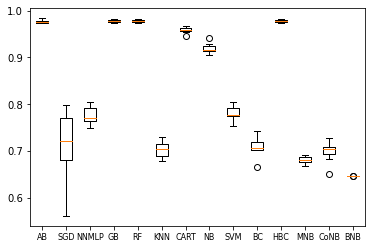


Prediction step

selectedName =  RF
0.9767096134786918
[[ 699   30]
 [  17 1272]]
              precision    recall  f1-score   support

         bad       0.98      0.96      0.97       729
        good       0.98      0.99      0.98      1289

    accuracy                           0.98      2018
   macro avg       0.98      0.97      0.97      2018
weighted avg       0.98      0.98      0.98      2018



In [ ]:
# Source code: https://machinelearningmastery.com/machine-learning-in-python-step-by-step/
# Additional list of ML methods:
## https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/
## https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html


# Compare algorithms
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Ensemble
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
import random
random_value = 1

# Load dataset
file = "https://raw.githubusercontent.com/ivanksinggih/Intel_minifab_Anylogic/data/final_data_values_selected.csv"
data_title = ['total_captures_queue_A_per_week', 'total_captures_queue_B_per_week', 'total_captures_queue_C_per_week', 'total_captures_queue_AB_per_week', 'total_captures_queue_A_1_per_week', 'total_captures_queue_A_5_per_week', 'total_captures_queue_B_5_per_week', 'total_captures_queue_C_2_per_week', 'total_captures_queue_C_4_per_week', 'total_captures_queue_D_2_per_week', 'total_captures_queue_D_4_per_week', 'total_captures_queue_E_3_per_week', 'machine_A_step1_per_week', 'machine_B_step5_per_week', 'machine_C_step2_per_week', 'machine_C_step4_per_week', 'machine_D_step2_per_week', 'machine_D_step4_per_week', 'machine_E_step3_per_week;', 'machine_E_step6_per_week', 'machine_C_available_production_time_with_idle_per_week', 'machine_D_available_production_time_with_idle_per_week', 'machine_E_available_production_time_with_idle_per_week', 'machine_C_utilization_all_working_times_per_week', 'machine_A_idle_time_percentage_per_week', 'machine_B_idle_time_percentage_per_week', 'machine_C_idle_time_percentage_per_week', 'machine_D_idle_time_percentage_per_week', 'machine_E_idle_time_percentage_per_week', 'throughput_per_week']


dataset = read_csv(file, names=data_title)

# Split-out validation dataset
array = dataset.values
X = array[:,0:len(data_title)-1]
y = array[:,len(data_title)-1]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=random_value)

# Spot Check Algorithms
models = []
models.append(('AB', AdaBoostClassifier(random_state=random_value)))
models.append(('SGD', SGDClassifier(random_state=random_value, shuffle=True)))
models.append(('NNMLP', MLPClassifier(max_iter=1000, random_state=random_value, shuffle=True)))
models.append(('GB', GradientBoostingClassifier(random_state=random_value)))
models.append(('RF', RandomForestClassifier(random_state=random_value)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=random_value)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto', random_state=random_value)))

# Ensemble
models.append(('BC', BaggingClassifier(KNeighborsClassifier(), random_state=random_value)))
models.append(('HBC', HistGradientBoostingClassifier(random_state=random_value)))

# Naive Bayes
models.append(('MNB', MultinomialNB()))
models.append(('CoNB', ComplementNB()))
models.append(('BNB', BernoulliNB()))

# Evaluate each model in turn
results = []
names = []
selectedName = "";
selectedModel = "";
largestAccuracy = 0;
kfold = StratifiedKFold(n_splits=10, random_state=random_value, shuffle=True)
for name, model in models:
	random_seed = random.seed(random_value)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	optimized_parameters = model.get_params(deep=True)
	results.append(cv_results)
	names.append(name)
	if (cv_results.mean() > largestAccuracy):
		largestAccuracy = cv_results.mean();
		selectedName = name;
		selectedModel = model;
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
	print()

# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.tick_params(axis='x', which='major', labelsize=8)
pyplot.show()

print()
print('Prediction step')
# Make predictions on validation dataset
print()
print('selectedName = ',selectedName)
selectedModel.fit(X_train, Y_train)
predictions = selectedModel.predict(X_validation)
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))